In [3]:
import socket

print("Hostname: " + socket.gethostname())

Hostname: sx-el-121920


# CLIP

In [4]:
import numpy as np
import torch
#from pkg_resources import packaging

%load_ext autoreload
%autoreload 2

print("Torch version:", torch.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Torch version: 1.13.0a0+d0d6b1f


## Load datasets

In [5]:
from utils.mnist_preprocessing import *
from torchvision import transforms

# parameters
size_of_batch = 128

# dataset preparation
train_set_gray = DatasetMNIST(root='./data',
                       env='train',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_gray = DatasetMNIST(root='./data',
                       env='val',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_gray = DatasetMNIST(root='./data',
                       env='test',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

train_set_color = DatasetMNIST(root='./data',
                       env='train',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_color = DatasetMNIST(root='./data',
                       env='val',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_color = DatasetMNIST(root='./data',
                       env='test',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

# dataloaders
train_loader_gray = torch.utils.data.DataLoader(dataset=train_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_gray = torch.utils.data.DataLoader(dataset=val_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_gray = torch.utils.data.DataLoader(dataset=test_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

train_loader_color = torch.utils.data.DataLoader(dataset=train_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_color = torch.utils.data.DataLoader(dataset=val_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_color = torch.utils.data.DataLoader(dataset=test_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)


Preparing Colored MNIST


TypeError: argument of type 'type' is not iterable

In [48]:
from utils.mnist_preprocessing import *
from torchvision import transforms

# parameters
size_of_batch = 128

# dataset preparation
train_set_color = DatasetMNIST(root='./data',
                       env='train',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_color = DatasetMNIST(root='./data',
                       env='val',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_color = DatasetMNIST(root='./data',
                       env='test',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

# dataloaders
train_loader_color = torch.utils.data.DataLoader(dataset=train_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_color = torch.utils.data.DataLoader(dataset=val_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_color = torch.utils.data.DataLoader(dataset=test_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)


MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists


In [82]:
print(f"Number of training samples: {len(train_loader_color.dataset.data_label_tuples)}")
print(f"Number of validation samples: {len(val_loader_color.dataset.data_label_tuples)}")
print(f"Number of testing samples: {len(test_loader_color.dataset.data_label_tuples)}")

Number of training samples: 9348
Number of validation samples: 1924
Number of testing samples: 1866


## Choosing a model

In [4]:
import clip

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [5]:
model, preprocess = clip.load("RN50")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 102,007,137
Input resolution: 224
Context length: 77
Vocab size: 49408


In [6]:
model

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

## Image preprocessing

In [7]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7fec4b2655e0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

## Text preprocessing

In [8]:
clip.tokenize("Hello World!")

tensor([[49406,  3306,  1002,   256, 49407,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

In [9]:
clip.tokenize("Hello World! My name is Patrick.")

tensor([[49406,  3306,  1002,   256,   607,  1981,   533,  5286,   269, 49407,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

In [10]:
clip.tokenize("Hello World! My name is Michelle.")

tensor([[49406,  3306,  1002,   256,   607,  1981,   533,  8625,   269, 49407,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

## Test performance of the clip model on the mnist dataset

In [13]:
mnist_template = 'a photo of the number: "{}".'
# mnist_classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
mnist_classes = ["5", "8"]

In [49]:
def clip_accuracy2(output, target, topk=(1,)):
    """
    Compute top-k accuracy of a classifier given the predictions (logits) and the ground-truth labels (target).
    """
    pred = output.topk(max(topk), 1, True, True)[1].t()
    pred[pred == 0] = 5
    pred[pred == 1] = 8
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    return [float(correct[:k].reshape(-1).float().sum(0, keepdim=True).cpu().numpy()) for k in topk]

def assess_performance2(clip_version, model, preprocess, class_labels, class_template, dataset_loader, dataset_name="Dataset name"):
    transform = transforms.ToPILImage()
    
    # building text features
    text_features = text_feature_generator(clip_version, model, class_labels, class_template)
    
    with torch.no_grad():
        top1, top3, n = 0., 0., 0.
        for images, ground_truth_label, _, _ in dataset_loader:
            
            # preprocess images
            images_new = []
            for img in images:
                images_new.append(preprocess(transform(img)))

            # building image features
            images = torch.tensor(np.stack(images_new)).cuda()
            
            # predict
            image_features = model.encode_image(images)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            similarities = image_features @ text_features

            # measure accuracy
            acc1, acc3 = clip_accuracy2(similarities, ground_truth_label.cuda(), topk=(1, 2))
            top1 += acc1
            top3 += acc3
            n += images.size(0)

    top1 = (top1 / n) * 100
    top3 = (top3 / n) * 100 

    print(f"{dataset_name} -> Top-1 accuracy: {top1:.2f}")
    print(f"{dataset_name} -> Top-3 accuracy: {top3:.2f}")

    return similarities, ground_truth_label

In [50]:
from utils.clip_utils import *

# assess_performance(clip, model, preprocess, mnist_classes, mnist_template, train_loader_gray, "Training gray")
# assess_performance(clip, model, preprocess, mnist_classes, mnist_template, val_loader_gray, "Validation gray")
# assess_performance(clip, model, preprocess, mnist_classes, mnist_template, test_loader_gray, "Test gray")

asdf, asdf2 = assess_performance2(clip, model, preprocess, mnist_classes, mnist_template, train_loader_color, "Training color")
assess_performance2(clip, model, preprocess, mnist_classes, mnist_template, val_loader_color, "Validation color")
assess_performance2(clip, model, preprocess, mnist_classes, mnist_template, test_loader_color, "Test color")

Training color -> Top-1 accuracy: 94.19
Training color -> Top-3 accuracy: 100.00
Validation color -> Top-1 accuracy: 94.80
Validation color -> Top-3 accuracy: 100.00
Test color -> Top-1 accuracy: 93.14
Test color -> Top-3 accuracy: 100.00


(tensor([[0.1835, 0.1840],
         [0.2296, 0.2081],
         [0.1953, 0.2094],
         [0.1948, 0.2274],
         [0.2014, 0.1857],
         [0.1964, 0.2104],
         [0.1801, 0.1926],
         [0.2269, 0.2749],
         [0.2186, 0.2119],
         [0.2327, 0.2048],
         [0.2162, 0.2566],
         [0.1862, 0.1664],
         [0.1929, 0.2039],
         [0.2092, 0.2017],
         [0.1904, 0.1808],
         [0.1869, 0.1831],
         [0.1993, 0.1825],
         [0.1754, 0.1703],
         [0.2046, 0.2217],
         [0.2073, 0.2559],
         [0.1765, 0.1797],
         [0.1798, 0.1881],
         [0.1726, 0.1787],
         [0.2081, 0.1855],
         [0.1771, 0.1866],
         [0.1882, 0.1823],
         [0.2048, 0.1815],
         [0.1989, 0.1852],
         [0.1825, 0.1959],
         [0.1857, 0.1748],
         [0.2257, 0.2032],
         [0.2379, 0.2095],
         [0.1829, 0.1844],
         [0.1711, 0.1726],
         [0.2015, 0.2247],
         [0.1879, 0.2072],
         [0.1768, 0.1876],
 

In [39]:
asdf3 = asdf.argmax(axis=1)
asdf3[asdf3 == 0] = 5
asdf3[asdf3 == 1] = 8
asdf3.cpu()

tensor([8, 5, 8, 5])

In [40]:
asdf2

tensor([8, 5, 8, 5])

In [41]:
(asdf3.cpu() == asdf2.cpu()).sum() / len(asdf3.cpu())

tensor(1.)

In [202]:
# images in skimage to use and their textual descriptions

# Results in:
# Training accuracy:  33.85%
# Validation accuracy:  36.16%
# Test accuracy:  34.16%
descriptions1 = {
    "0": "a number with the value zero",
    "1": "a number with the value one",
    "2": "a number with the value two",
    "3": "a number with the value three",
    "4": "a number with the value four",
    "5": "a number with the value five",
    "6": "a number with the value six",
    "7": "a number with the value seven",
    "8": "a number with the value eight",
    "9": "a number with the value nine"
}

# Results in:
# Training accuracy:  33.85%
# Validation accuracy:  36.16%
# Test accuracy:  34.16%
descriptions2 = {
    "0": 'a photo of the number: "0".',
    "1": 'a photo of the number: "1".',
    "2": 'a photo of the number: "2".',
    "3": 'a photo of the number: "3".',
    "4": 'a photo of the number: "4".',
    "5": 'a photo of the number: "5".',
    "6": 'a photo of the number: "6".',
    "7": 'a photo of the number: "7".',
    "8": 'a photo of the number: "8".',
    "9": 'a photo of the number: "9".',
}

descriptions3 = {
    "0": '0',
    "1": '1',
    "2": '2',
    "3": '3',
    "4": '4',
    "5": '5',
    "6": '6',
    "7": '7',
    "8": '8',
    "9": '9',
}

descriptions4 = {
    "0": 'zero',
    "1": 'one',
    "2": 'two',
    "3": 'three',
    "4": 'four',
    "5": 'five',
    "6": 'six',
    "7": 'seven',
    "8": 'eight',
    "9": 'nine',
}

descriptions = descriptions4

In [203]:
# exact same text tokens result in the same performance!(for descriptions 1-4)
(clip.tokenize(descriptions) == clip.tokenize(descriptions2)).all()

tensor(True)

Images vom eigenen Dataloader in das externe model einspeisen

https://stackoverflow.com/questions/53623472/how-do-i-display-a-single-image-in-pytorch

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

https://pillow.readthedocs.io/en/stable/reference/Image.html



In [204]:
from torchvision import transforms

# build text tokens
text_tokens = clip.tokenize(descriptions).cuda()

# variables
running_corrects = 0
nr_of_images = 0

# transformation
transform = transforms.ToPILImage()

# preprocess images in batches
for img_batch, ground_truth_label, _, _ in val_loader_gray:
    images_new = []
    for img in img_batch:
        # process a batch of images
        images_new.append(preprocess(transform(img)))
        nr_of_images += 1
    
    # building image features
    image_input = torch.tensor(np.stack(images_new)).cuda()

    # inference
    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        text_features = model.encode_text(text_tokens).float()
    
    # compute cosine similarity
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)   
    class_embedding = text_features.mean(dim=0)
    class_embedding /= class_embedding.norm() 
    text_probs = (100.0 * image_features @ class_embedding.T).softmax(dim=-1)
    
    running_corrects += torch.sum(text_probs.argmax(axis=1) == ground_truth_label.cuda()).item()

print(f"Validation gray accuracy: {100.0 * running_corrects / nr_of_images}%")

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [227]:
text_features /= text_features.norm(dim=-1, keepdim=True)
print(f"{text_features.shape}")
print(f"{class_embedding.shape}")

torch.Size([10, 1024])
torch.Size([1024])


torch.Size([10, 1024])

In [214]:
image_features.shape

torch.Size([128, 1024])

In [215]:
text_features.shape

torch.Size([10, 1024])

In [217]:
class_embeddings.shape

torch.Size([1, 512])

In [213]:
text_probs.shape

torch.Size([128])

In [206]:
text_probs.shape

torch.Size([128])

In [207]:
ground_truth_label.shape

torch.Size([128])

In [ ]:
image_features.size()

In [ ]:
text_features.size()

In [ ]:
text_features.mean(dim=1).size()

In [ ]:
torch.sum(text_probs.argmax == ground_truth_label.cuda()).item()

In [ ]:
text_probs.argmax == ground_truth_label.cuda()

In [ ]:
ground_truth_label

In [ ]:
text_probs.argmax()

In [ ]:
text_probs.size()

In [ ]:
ground_truth_label.size()

In [ ]:
running_corrects

In [ ]:
from utils.clip_utils import *

# len(=nr_of_batches)*batch_size=nr_of_samples
# len(val_loader)-1 full batches with a size of 128 images
# one last batch with the remaining <128 images
#(len(val_loader)-1) * 128 + 16 

asses_clip_performance(model, preprocess, train_loader_gray, descriptions, dataset_name="Training gray")
asses_clip_performance(model, preprocess, val_loader_gray, descriptions, dataset_name="Validation gray")
asses_clip_performance(model, preprocess, test_loader_gray, descriptions, dataset_name="Test gray")

In [ ]:
asses_clip_performance(model, preprocess, train_loader_color, descriptions, dataset_name="Training color")
asses_clip_performance(model, preprocess, val_loader_color, descriptions, dataset_name="Validation color")
asses_clip_performance(model, preprocess, test_loader_color, descriptions, dataset_name="Test color")

In [ ]:
image.size

In [ ]:
image

In [ ]:
preprocess(image).permute(1, 2, 0).size()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(preprocess(image).permute(1, 2, 0))

## Sample random examples from dataset

In [ ]:
from utils.mnist_preprocessing import *
from utils.mnist_plotting import *

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

In [ ]:
from utils.mnist_general import *

original_gray_images, gray_images, texts = show_examples_0_to_9(val_set_gray, preprocess, descriptions)

In [ ]:
from utils.mnist_general import *

original_color_images, color_images, texts = show_examples_0_to_9(val_set_color, preprocess, descriptions)

## Compute similarities

In [ ]:
from utils.clip_utils import *

similarity = clip_inference(model, gray_images, texts)
show_cosine_similarities(similarity.cpu(), original_gray_images, texts)

# displaying cosine similarity with a softmax does not make any sense, because every probability is 10%!
# show_cosine_similarities(np.exp(similarity.cpu())/np.exp(similarity.cpu()).sum(axis=0), original_gray_images, texts)

In [ ]:
from utils.clip_utils import *

similarity = clip_inference(model, color_images, texts)
show_cosine_similarities(similarity.cpu(), original_color_images, texts)

## Inspect top-k performance

In [ ]:
text_probs = clip_inference(model, gray_images, texts, probabilities=True)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
show_text_img_probs(original_gray_images, top_probs, top_labels, texts)

In [ ]:
text_probs = clip_inference(model, color_images, texts, probabilities=True)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
show_text_img_probs(original_color_images, top_probs, top_labels, texts)

top-1 accuracy for MNIST test dataset: 57.840  
top-1 accuracy for MNIST train dataset: 57.703   
top-1 accuracy for CIFAR10 dataset: 71.540

top-1 accuracy for MNIST dataset (test_set_gray): 57.840  
top-1 accuracy for MNIST dataset (train_set_gray): 57.462


In [ ]:
import torch
import clip
import os
from torchvision.datasets import  MNIST, CIFAR10
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('RN50', device)

# from https://github.com/openai/CLIP/blob/main/data/prompts.md
mnist_classes = ['0','1','2','3','4','5','6','7','8','9',]
mnist_templates = ['a photo of the number: "{}".',]
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]
cifar10_templates = [
    'a photo of a {}.',
    'a blurry photo of a {}.',
    'a black and white photo of a {}.',
    'a low contrast photo of a {}.',
    'a high contrast photo of a {}.',
    'a bad photo of a {}.',
    'a good photo of a {}.',
    'a photo of a small {}.',
    'a photo of a big {}.',
    'a photo of the {}.',
    'a blurry photo of the {}.',
    'a black and white photo of the {}.',
    'a low contrast photo of the {}.',
    'a high contrast photo of the {}.',
    'a bad photo of the {}.',
    'a good photo of the {}.',
    'a photo of the small {}.',
    'a photo of the big {}.',
]


class_map = {'MNIST': mnist_classes, 'CIFAR10': cifar10_classes}
template_map = {'MNIST': mnist_templates, 'CIFAR10': cifar10_templates}

@torch.no_grad()
def accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.reshape(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size).item())
    return res


@torch.no_grad()
def extract_text_features(dataset_name):
    # code borrowed from: https://github.com/openai/CLIP/blob/fcab8b6eb92af684e7ff0a904464be7b99b49b88/notebooks/Prompt_Engineering_for_ImageNet.ipynb
    class_names = class_map[dataset_name]
    templates = template_map[dataset_name]
    model.to(device)
    model.eval()

    zeroshot_weights = []
    for classname in class_names:
        texts = [template.format(classname) for template in templates]
        texts = clip.tokenize(texts).to(device)
        class_embeddings = model.encode_text(texts)
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        class_embedding = class_embeddings.mean(dim=0)
        class_embedding /= class_embedding.norm()
        zeroshot_weights.append(class_embedding)
        # class_embeddings = model.encode_text(texts)
        # class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        # zeroshot_weights.append(class_embeddings)
    zeroshot_weights = torch.stack(zeroshot_weights, dim=1).to(device)
    return zeroshot_weights

mnist = MNIST(root=os.path.expanduser("~/.cache"), download=True, train=False)
mnist_train = MNIST(root=os.path.expanduser("~/.cache"), download=True, train=True)
#cifar10 = CIFAR10(root=os.path.expanduser("~/.cache"), download=True, train=False)

for dataset in [mnist]:
    # extract image feature, code borrowed from: https://github.com/openai/CLIP#zero-shot-prediction
    image_features = []
    image_labels = []
    for image, class_id in dataset:
        
        print(image)
        print(type(image))
        print(image.size)
        print(class_id)
        
        image_input = preprocess(image).unsqueeze(0).to(device)
        
        print(image_input)
        print(type(image_input))
        print(image_input.size())
        break
    
        with torch.no_grad():
            image_feature = model.encode_image(image_input)
        image_feature /= image_feature.norm()
        image_features.append(image_feature)
        image_labels.append(class_id)
    image_features = torch.stack(image_features, dim=1).to(device)
    image_features = image_features.squeeze()
    # extract text feature
    dataset_name = 'MNIST'
    text_features = extract_text_features(dataset_name)
    
    # compute top-1 accuracy
    logits = (100. * image_features @ text_features).softmax(dim=-1)
    image_labels = torch.tensor(image_labels).unsqueeze(dim=1).to(device)
    top1_acc = accuracy(logits, image_labels, (1,))
    print(f'top-1 accuracy for {dataset_name} dataset: {top1_acc[0]:.3f}')


: 

In [112]:
import torch
import clip
import os
from torchvision.datasets import  MNIST, CIFAR10
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('RN50', device)

# from https://github.com/openai/CLIP/blob/main/data/prompts.md
mnist_classes = ['0','1','2','3','4','5','6','7','8','9',]
mnist_templates = ['a photo of the number: "{}".',]
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]
cifar10_templates = [
    'a photo of a {}.',
    'a blurry photo of a {}.',
    'a black and white photo of a {}.',
    'a low contrast photo of a {}.',
    'a high contrast photo of a {}.',
    'a bad photo of a {}.',
    'a good photo of a {}.',
    'a photo of a small {}.',
    'a photo of a big {}.',
    'a photo of the {}.',
    'a blurry photo of the {}.',
    'a black and white photo of the {}.',
    'a low contrast photo of the {}.',
    'a high contrast photo of the {}.',
    'a bad photo of the {}.',
    'a good photo of the {}.',
    'a photo of the small {}.',
    'a photo of the big {}.',
]


class_map = {'MNIST': mnist_classes, 'CIFAR10': cifar10_classes}
template_map = {'MNIST': mnist_templates, 'CIFAR10': cifar10_templates}

@torch.no_grad()
def accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.reshape(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size).item())
    return res


mnist = MNIST(root=os.path.expanduser("~/.cache"), download=True, train=False)
cifar10 = CIFAR10(root=os.path.expanduser("~/.cache"), download=True, train=False)

for dataset in [mnist, cifar10]:
    # extract image feature, code borrowed from: https://github.com/openai/CLIP#zero-shot-prediction
    image_features = []
    image_labels = []
    for image, class_id in dataset:
        image_input = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            image_feature = model.encode_image(image_input)
        image_feature /= image_feature.norm()
        image_features.append(image_feature)
        image_labels.append(class_id)
    image_features = torch.stack(image_features, dim=1).to(device)
    image_features = image_features.squeeze()
    
    # extract text feature
    dataset_name = 'MNIST' if dataset == mnist else 'CIFAR10'
    text_features = extract_text_features(dataset_name)
    
    with torch.no_grad():
        # code borrowed from: https://github.com/openai/CLIP/blob/fcab8b6eb92af684e7ff0a904464be7b99b49b88/notebooks/Prompt_Engineering_for_ImageNet.ipynb
        class_names = class_map[dataset_name]
        templates = template_map[dataset_name]
        model.to(device)
        model.eval()
        
        print(class_names)

        zeroshot_weights = []
        for classname in class_names:
            texts = [template.format(classname) for template in templates]
            texts = clip.tokenize(texts).to(device)
            class_embeddings = model.encode_text(texts)
            class_embeddings /= class_embeddings.norm(p=2, dim=-1, keepdim=True)
            class_embedding = class_embeddings.mean(dim=0)
            class_embedding /= class_embedding.norm(p=2)
            zeroshot_weights.append(class_embedding)
        text_features = torch.stack(zeroshot_weights, dim=1).to(device)
    
    # compute top-1 accuracy
    logits = (100. * image_features @ text_features).softmax(dim=-1)
    image_labels = torch.tensor(image_labels).unsqueeze(dim=1).to(device)
    top1_acc = accuracy(logits, image_labels, (1,))
    print(f'top-1 accuracy for {dataset_name} dataset: {top1_acc[0]:.3f}')

Files already downloaded and verified
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
top-1 accuracy for MNIST dataset: 57.840
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
top-1 accuracy for CIFAR10 dataset: 71.540


In [113]:
text_features.shape

torch.Size([1024, 10])

In [ ]:
model

In [ ]:
print(image_features[0].min())
print(image_features[0].max())
print(image_features[0].mean())
print(image_features[0].median())
print(image_features[0].sum())

In [ ]:
for i in test_loader_gray:
    img, ground_truth_label, low_high_label, color_label = i
    print(img)
    print(ground_truth_label)
    break

In [ ]:
img.shape

In [ ]:
ground_truth_label.shape

In [103]:
import torch
import clip
import os
from torchvision.datasets import  MNIST, CIFAR10
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('RN50', device)

@torch.no_grad()
def accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.reshape(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size).item())
    return res


@torch.no_grad()
def extract_text_features(dataset_name):
    # code borrowed from: https://github.com/openai/CLIP/blob/fcab8b6eb92af684e7ff0a904464be7b99b49b88/notebooks/Prompt_Engineering_for_ImageNet.ipynb
    class_names = class_map[dataset_name]
    templates = template_map[dataset_name]
    model.to(device)
    model.eval()

    zeroshot_weights = []
    for classname in class_names:
        texts = [template.format(classname) for template in templates]
        texts = clip.tokenize(texts).to(device)
        class_embeddings = model.encode_text(texts)
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        class_embedding = class_embeddings.mean(dim=0)
        class_embedding /= class_embedding.norm()
        zeroshot_weights.append(class_embedding)
        # class_embeddings = model.encode_text(texts)
        # class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        # zeroshot_weights.append(class_embeddings)
    zeroshot_weights = torch.stack(zeroshot_weights, dim=1).to(device)
    return zeroshot_weights

# extract image feature, code borrowed from: https://github.com/openai/CLIP#zero-shot-prediction
image_features = []
image_labels = []
for image, class_id, _, _ in test_set_gray: # img, ground_truth_label, low_high_label, color_label
    
    # print(image)
    # print(type(image))
    # print(image.shape)
    # print(class_id)
    image_input = preprocess(transform(image)).unsqueeze(0).to(device)
    
    with torch.no_grad():
        image_feature = model.encode_image(image_input)
    image_feature /= image_feature.norm()
    image_features.append(image_feature)
    image_labels.append(class_id)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
# extract text feature
dataset_name = 'MNIST'
# replace this
# text_features = extract_text_features(dataset_name)
# with this
text_tokens = clip.tokenize(descriptions2).cuda()
with torch.no_grad():
    text_features = model.encode_text(text_tokens).double()
text_features /= text_features.norm(dim=-1, keepdim=True)  
text_features = text_features.T

# compute top-1 accuracy
logits = (100. * image_features.double() @ text_features.double()).softmax(dim=-1)
image_labels = torch.tensor(image_labels).unsqueeze(dim=1).to(device)
top1_acc = accuracy(logits, image_labels, (1,))
print(f'top-1 accuracy for {dataset_name} dataset: {top1_acc[0]:.3f}')


top-1 accuracy for MNIST dataset: 45.060


In [110]:
text_features.mean(dim=1).norm()

tensor(0.9802, device='cuda:0', dtype=torch.float64)

In [96]:
image_features

tensor([[-0.0051, -0.0002, -0.0193,  ..., -0.0250, -0.0024,  0.0133],
        [ 0.0013,  0.0041, -0.0175,  ..., -0.0153, -0.0010,  0.0127],
        [-0.0122, -0.0090, -0.0158,  ..., -0.0217,  0.0108,  0.0004],
        ...,
        [-0.0135,  0.0072, -0.0182,  ..., -0.0142,  0.0086, -0.0184],
        [-0.0098,  0.0011, -0.0131,  ..., -0.0136,  0.0150, -0.0083],
        [-0.0071, -0.0054, -0.0126,  ..., -0.0150,  0.0014, -0.0031]],
       device='cuda:0', dtype=torch.float16)

In [102]:
text_features.double()

tensor([[-1.6719e-03,  4.5942e-03,  7.7758e-03,  ...,  1.4802e-02,
         -7.3520e-04, -8.8227e-04],
        [ 1.9620e-02,  2.8473e-02,  3.0190e-02,  ...,  2.1610e-02,
          2.1146e-02,  2.3085e-02],
        [ 3.4248e-03, -8.9793e-03, -4.1723e-03,  ...,  9.2404e-05,
         -1.2647e-02, -1.1973e-02],
        ...,
        [-9.2012e-03, -1.5708e-02, -1.3152e-02,  ..., -1.0091e-02,
         -1.0765e-02, -1.3354e-02],
        [-1.2440e-03,  4.3249e-03,  7.0825e-03,  ..., -8.8794e-03,
          6.1004e-03, -3.2623e-03],
        [ 1.0932e-02,  5.8482e-03,  4.1266e-03,  ...,  7.3493e-03,
          8.3322e-03,  6.5514e-03]], device='cuda:0', dtype=torch.float64)

In [98]:
image_features.float() @ text_features.float()

tensor([[0.1861, 0.1835, 0.1923,  ..., 0.2289, 0.2035, 0.2085],
        [0.1813, 0.1798, 0.1999,  ..., 0.2007, 0.1841, 0.1799],
        [0.1744, 0.1748, 0.1757,  ..., 0.1813, 0.1814, 0.1764],
        ...,
        [0.1770, 0.1744, 0.1732,  ..., 0.1904, 0.1869, 0.1868],
        [0.1795, 0.1770, 0.1791,  ..., 0.1896, 0.1875, 0.1826],
        [0.1726, 0.1706, 0.1786,  ..., 0.1823, 0.1789, 0.1749]],
       device='cuda:0')

torch.Size([1024, 10])

In [87]:
# neu
print(type(text_features.T))
print(text_features.T.shape)
text_features.T

<class 'torch.Tensor'>
torch.Size([1024, 10])


tensor([[-1.6719e-03,  4.5942e-03,  7.7758e-03,  ...,  1.4802e-02,
         -7.3520e-04, -8.8227e-04],
        [ 1.9620e-02,  2.8473e-02,  3.0190e-02,  ...,  2.1610e-02,
          2.1146e-02,  2.3085e-02],
        [ 3.4248e-03, -8.9793e-03, -4.1723e-03,  ...,  9.2404e-05,
         -1.2647e-02, -1.1973e-02],
        ...,
        [-9.2012e-03, -1.5708e-02, -1.3152e-02,  ..., -1.0091e-02,
         -1.0765e-02, -1.3354e-02],
        [-1.2440e-03,  4.3249e-03,  7.0825e-03,  ..., -8.8794e-03,
          6.1004e-03, -3.2623e-03],
        [ 1.0932e-02,  5.8482e-03,  4.1266e-03,  ...,  7.3493e-03,
          8.3322e-03,  6.5514e-03]], device='cuda:0',
       grad_fn=<PermuteBackward0>)

In [83]:
#original
print(type(text_features))
print(text_features.shape)
text_features

<class 'torch.Tensor'>
torch.Size([1024, 10])


tensor([[ 0.0074,  0.0242,  0.0262,  ...,  0.0374,  0.0075,  0.0101],
        [ 0.0266,  0.0250,  0.0255,  ...,  0.0295,  0.0195,  0.0208],
        [ 0.0256,  0.0160,  0.0174,  ...,  0.0154, -0.0002,  0.0079],
        ...,
        [-0.0182, -0.0243, -0.0136,  ..., -0.0111, -0.0190, -0.0184],
        [-0.0012, -0.0005,  0.0009,  ..., -0.0216,  0.0034, -0.0095],
        [ 0.0072,  0.0074,  0.0079,  ...,  0.0077,  0.0066,  0.0050]],
       device='cuda:0', dtype=torch.float16)

In [59]:
# one image with 224x224 pixels with three RGB channels
image_input.shape

torch.Size([1, 3, 224, 224])

In [57]:
# 10k dataset times 1024 features
image_features.shape

torch.Size([10000, 1024])

In [60]:
# probabilites for each digit of the 10k test samples
logits.shape

torch.Size([10000, 10])

In [58]:
text_features.shape

torch.Size([1024, 10])

In [54]:
text_features_github = text_features

In [56]:
text_features_github.shape

torch.Size([1024, 10])

In [45]:
image.size()

torch.Size([3, 28, 28])

In [19]:
Image.fromarray(image.numpy())

TypeError: Cannot handle this data type: (1, 1, 28), <f4

In [22]:
(image).permute(1, 2, 0).shape

torch.Size([28, 28, 3])

In [23]:
(image).shape

torch.Size([3, 28, 28])

In [33]:
type(image)

torch.Tensor

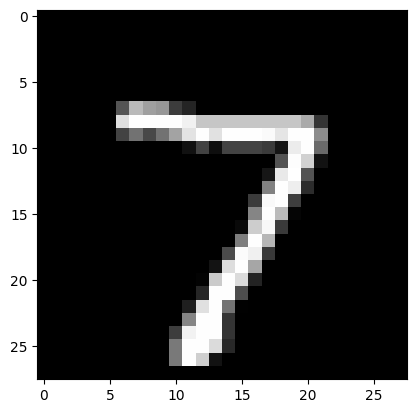

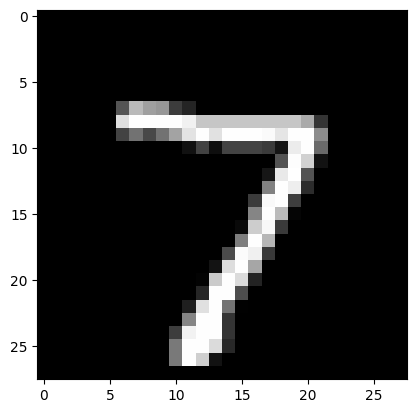

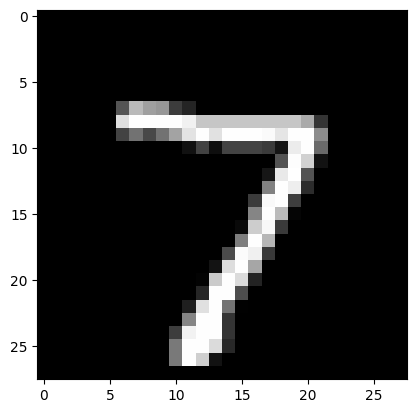

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


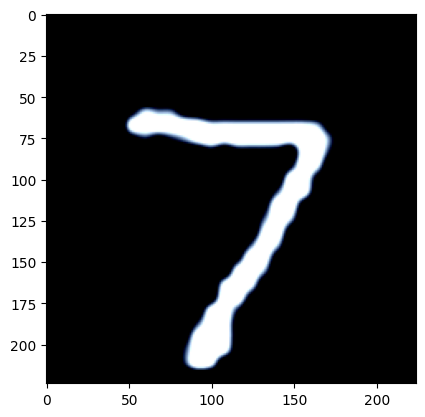

In [37]:
import  matplotlib.pyplot as plt

# display tensor image
plt.imshow(image.permute(1, 2, 0))
plt.show()

# display numpy image
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

# display PIL image
transform = transforms.ToPILImage()
plt.imshow(preprocess(transform(image)).permute(1, 2, 0))
plt.show()

In [37]:
import torch
import clip
import os
from torchvision.datasets import  MNIST, CIFAR10
import numpy as np
import sys

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('RN50', device)

# from https://github.com/openai/CLIP/blob/main/data/prompts.md
mnist_classes = ['0','1','2','3','4','5','6','7','8','9',]
mnist_templates = ['a photo of the number: "{}".',]
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]
cifar10_templates = [
    'a photo of a {}.',
    'a blurry photo of a {}.',
    'a black and white photo of a {}.',
    'a low contrast photo of a {}.',
    'a high contrast photo of a {}.',
    'a bad photo of a {}.',
    'a good photo of a {}.',
    'a photo of a small {}.',
    'a photo of a big {}.',
    'a photo of the {}.',
    'a blurry photo of the {}.',
    'a black and white photo of the {}.',
    'a low contrast photo of the {}.',
    'a high contrast photo of the {}.',
    'a bad photo of the {}.',
    'a good photo of the {}.',
    'a photo of the small {}.',
    'a photo of the big {}.',
]


class_map = {'MNIST': mnist_classes, 'CIFAR10': cifar10_classes}
template_map = {'MNIST': mnist_templates, 'CIFAR10': cifar10_templates}

@torch.no_grad()
def accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.reshape(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size).item())
    return res


@torch.no_grad()
def extract_text_features(dataset_name):
    # code borrowed from: https://github.com/openai/CLIP/blob/fcab8b6eb92af684e7ff0a904464be7b99b49b88/notebooks/Prompt_Engineering_for_ImageNet.ipynb
    class_names = class_map[dataset_name]
    templates = template_map[dataset_name]
    model.to(device)
    model.eval()

    # original
    if True:
        zeroshot_weights = []
        for classname in class_names:
            texts = [template.format(classname) for template in templates]
            texts = clip.tokenize(texts).to(device)
            class_embeddings = model.encode_text(texts)
            # np.set_printoptions(threshold=sys.maxsize)
            print(f"{classname} -> class_embeddings: {class_embeddings}")
            print(f"{classname} -> Norm of class_embeddings from model: {(class_embeddings**2).sum()}")
            class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
            print(f"{classname} -> Norm of class_embeddings after first normalization: {(class_embeddings**2).sum()}")
            
            class_embeddings = class_embeddings.squeeze()
            # class_embedding = class_embeddings.mean(dim=0)
            # class_embedding = class_embeddings
            
            class_embeddings /= class_embeddings.norm()
            print(f"{classname} -> Norm of class_embeddings after second normalization: {(class_embeddings**2).sum()}")
            print("\n")
            zeroshot_weights.append(class_embeddings)
        zeroshot_weights = torch.stack(zeroshot_weights, dim=1).to(device)
        return zeroshot_weights
    else:
        # modified
        zeroshot_weights = []
        for classname in class_names:
            texts = [template.format(classname) for template in templates]
            texts = clip.tokenize(texts).to(device)
            class_embeddings = model.encode_text(texts)
            class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
            # class_embedding = class_embeddings.mean(dim=0)
            # class_embedding /= class_embedding.norm()
            zeroshot_weights.append(class_embedding)
        zeroshot_weights = torch.stack(zeroshot_weights, dim=1).to(device)
        return zeroshot_weights

mnist = MNIST(root=os.path.expanduser("~/.cache"), download=True, train=False)
cifar10 = CIFAR10(root=os.path.expanduser("~/.cache"), download=True, train=False)

for dataset in [mnist]:
    # extract image feature, code borrowed from: https://github.com/openai/CLIP#zero-shot-prediction
    image_features = []
    image_labels = []
    for image, class_id in dataset:
        image_input = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            image_feature = model.encode_image(image_input)
        image_feature /= image_feature.norm()
        image_features.append(image_feature)
        image_labels.append(class_id)
    image_features = torch.stack(image_features, dim=1).to(device)
    image_features = image_features.squeeze()
    
    # extract text feature
    dataset_name = 'MNIST' if dataset == mnist else 'CIFAR10'
    text_features = extract_text_features(dataset_name)
    
    print(text_features)
    print(text_features.shape)
    
    # compute top-1 accuracy
    logits = (100. * image_features @ text_features).softmax(dim=-1)
    image_labels = torch.tensor(image_labels).unsqueeze(dim=1).to(device)
    top1_acc = accuracy(logits, image_labels, (1,))
    print(f'top-1 accuracy for {dataset_name} dataset: {top1_acc[0]:.3f}')


Files already downloaded and verified
0 -> class_embeddings: tensor([[ 0.1016,  0.3667,  0.3521,  ..., -0.2512, -0.0161,  0.0999]],
       device='cuda:0', dtype=torch.float16)
0 -> Norm of class_embeddings from model: 189.75
0 -> Norm of class_embeddings after first normalization: 1.0
0 -> Norm of class_embeddings after second normalization: 1.0


1 -> class_embeddings: tensor([[ 0.3337,  0.3447,  0.2211,  ..., -0.3357, -0.0073,  0.1019]],
       device='cuda:0', dtype=torch.float16)
1 -> Norm of class_embeddings from model: 190.125
1 -> Norm of class_embeddings after first normalization: 0.99951171875
1 -> Norm of class_embeddings after second normalization: 0.99951171875


2 -> class_embeddings: tensor([[ 0.3525,  0.3438,  0.2346,  ..., -0.1827,  0.0124,  0.1069]],
       device='cuda:0', dtype=torch.float16)
2 -> Norm of class_embeddings from model: 181.5
2 -> Norm of class_embeddings after first normalization: 1.0
2 -> Norm of class_embeddings after second normalization: 1.0


3 -

In [ ]:
torch.from_numpy(np.array([]))

In [11]:
clip.tokenize

<function clip.clip.tokenize(texts: Union[str, List[str]], context_length: int = 77, truncate: bool = False) -> Union[torch.IntTensor, torch.LongTensor]>

In [ ]:
dataset_name = 'MNIST'

class_names = class_map[dataset_name]
templates = template_map[dataset_name]
model.to(device)
model.eval()

zeroshot_weights = []
with torch.no_grad():
    for classname in class_names:
        texts = [template.format(classname) for template in templates]
        print(classname)
        texts = clip.tokenize(texts).to(device)
        class_embeddings = model.encode_text(texts) # one feature vector of size torch.Size([1, 1024]) for each of the 10 texts
        if ((class_embeddings**2).sum().item() != 1):
            print(f"Oops: Norm of {classname} is {(class_embeddings**2).sum().item()}")
        # print(class_embeddings)
        # print(class_embeddings.norm(dim=-1, keepdim=True))
        # raise Exception("Ooops")
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True) # normalize the vector using the frobenius norm to length equal to 1 (check with (class_embeddings**2).sum())
        # print((class_embeddings**2).sum())
        # print(class_embeddings.shape)
        # print(class_embeddings.squeeze().shape)
        # print(class_embeddings.mean(dim=0).shape)
        # print((class_embeddings == class_embeddings.mean(dim=0)).all())
        # print()
        # class_embedding = class_embeddings.mean(dim=0) # very awkward way to get rid of an extra 1x dimension class_embeddings.squeeze()
        # print("Mean: ", class_embedding)
        # print("Norm of the mean: ", class_embedding.norm())
        # class_embedding /= class_embedding.norm() # the norm is usually 1, except for the numbers 1, 6, 7 and 8
        # zeroshot_weights.append(class_embedding)
    # zeroshot_weights = torch.stack(zeroshot_weights, dim=1).to(device) # ends up with a matrix representing the 1024 features for each of the ten texts (torch.Size([1024, 10]))

In [145]:
dataset_name = 'MNIST'

class_names = class_map[dataset_name]
templates = template_map[dataset_name]
model.to(device)
model.eval()

zeroshot_weights = []
with torch.no_grad():
    for classname in class_names:
        texts = [template.format(classname) for template in templates]
        print(classname)
        texts = clip.tokenize(texts).to(device)
        class_embeddings = model.encode_text(texts) # one feature vector of size torch.Size([1, 1024]) for each of the 10 texts
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        val = (class_embeddings**2).sum().item()
        if (val != 1):
            print(f"Oops: Norm of {classname} is {val} with diff={1-val}")
            
        class_embeddings /= class_embeddings.norm()
        val = (class_embeddings**2).sum().item()
        if (val != 1):
            print(f"Oops: Norm of {classname} is {val} with diff={1-val}")

        class_embeddings /= class_embeddings.norm()
        val = (class_embeddings**2).sum().item()
        if (val != 1):
            print(f"Oops: Norm of {classname} is {val} with diff={1-val}")

        class_embeddings /= class_embeddings.norm()
        val = (class_embeddings**2).sum().item()
        if (val != 1):
            print(f"Oops: Norm of {classname} is {val} with diff={1-val}")


0
1
Oops: Norm of 1 is 0.99951171875 with diff=0.00048828125
Oops: Norm of 1 is 0.99951171875 with diff=0.00048828125
Oops: Norm of 1 is 0.99951171875 with diff=0.00048828125
Oops: Norm of 1 is 0.99951171875 with diff=0.00048828125
2
3
4
5
6
Oops: Norm of 6 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 6 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 6 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 6 is 1.0009765625 with diff=-0.0009765625
7
Oops: Norm of 7 is 0.99951171875 with diff=0.00048828125
Oops: Norm of 7 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 7 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 7 is 1.0009765625 with diff=-0.0009765625
8
Oops: Norm of 8 is 0.99951171875 with diff=0.00048828125
Oops: Norm of 8 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 8 is 1.0009765625 with diff=-0.0009765625
Oops: Norm of 8 is 1.0009765625 with diff=-0.0009765625
9


In [98]:
class_embeddings.norm()

tensor(0.9995, device='cuda:0', dtype=torch.float16)

In [99]:
def compute_norm(arr):
    return np.sqrt((arr**2).sum()) # no sqrt(..) for performance reasons (should equal to sqrt(1) == 1)

asdf_torch = class_embeddings[0].cpu()
asdf_np = asdf_torch.numpy().astype(np.float16) # changing between float16, float32 and float64 doesn't change the result

asdf_np_norm = compute_norm(asdf_np)
print(f"Old norm numpy: {asdf_np_norm}")
print(f"New norm numpy: {compute_norm(asdf_np/asdf_np_norm)}")

Old norm numpy: 0.99951171875
New norm numpy: 1.0


In [100]:
asdf_torch_norm = compute_norm(asdf_torch)
print(f"Old norm torch: {asdf_torch}")
print(f"New norm torch: {compute_norm(asdf_torch/asdf_torch_norm)}")

Old norm torch: tensor([ 0.0075,  0.0195, -0.0002,  ..., -0.0190,  0.0034,  0.0066],
       dtype=torch.float16)
New norm torch: 1.0


In [101]:
class_embeddings[0].norm()

tensor(0.9995, device='cuda:0', dtype=torch.float16)

In [29]:
dataset_name = 'MNIST'

class_names = class_map[dataset_name]
templates = template_map[dataset_name]
model.to(device)
model.eval()

zeroshot_weights = []
with torch.no_grad():
    for classname in (class_names):
        texts = [template.format(classname) for template in templates] #format with class
        texts = clip.tokenize(texts).cuda() #tokenize
        class_embeddings = model.encode_text(texts) #embed with text encoder
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        class_embedding = class_embeddings.mean(dim=0)
        class_embedding /= class_embedding.norm()
        zeroshot_weights.append(class_embedding)
    zeroshot_weights = torch.stack(zeroshot_weights, dim=1).cuda()
zeroshot_weights

tensor([[ 0.0074,  0.0242,  0.0262,  ...,  0.0374,  0.0075,  0.0101],
        [ 0.0266,  0.0250,  0.0255,  ...,  0.0295,  0.0195,  0.0208],
        [ 0.0256,  0.0160,  0.0174,  ...,  0.0154, -0.0002,  0.0079],
        ...,
        [-0.0182, -0.0243, -0.0136,  ..., -0.0111, -0.0190, -0.0184],
        [-0.0012, -0.0005,  0.0009,  ..., -0.0216,  0.0034, -0.0095],
        [ 0.0072,  0.0074,  0.0079,  ...,  0.0077,  0.0066,  0.0050]],
       device='cuda:0', dtype=torch.float16)

In [30]:
zeroshot_weights.shape

torch.Size([1024, 10])

In [190]:
dataset_name = 'MNIST'

class_names = class_map[dataset_name]
templates = template_map[dataset_name]
model.to(device)
model.eval()

zeroshot_weights = []
for classname in class_names:
    texts = [template.format(classname) for template in templates]
    texts = clip.tokenize(texts).to(device)
    class_embeddings = model.encode_text(texts) # one feature vector of size torch.Size([1, 1024]) for each of the 10 texts
    class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True) # normalize the vector using the frobenius norm to length equal to 1 (check with (class_embeddings**2).sum())
    #class_embedding = class_embeddings.mean(dim=0)
print(class_embedding)
print(class_embedding.shape)
print(class_embedding.norm())
#     class_embedding /= class_embedding.norm()
#     zeroshot_weights.append(class_embedding)
# zeroshot_weights = torch.stack(zeroshot_weights, dim=1).to(device)

tensor([-5.9929e-03,  1.6754e-02, -2.8000e-03,  4.1626e-02, -2.0477e-02,
         9.6893e-03, -1.3840e-02, -1.3367e-01,  2.2621e-03,  4.0527e-02,
         1.2465e-03, -2.8687e-02, -6.9962e-03, -1.1124e-02, -8.7738e-03,
        -1.6403e-02,  2.3987e-02, -9.8495e-03,  1.9729e-05,  1.6159e-02,
         2.2842e-02,  2.0782e-02,  2.4994e-02,  8.3771e-03, -1.2245e-03,
         1.5354e-03, -5.9166e-03,  2.1835e-02, -2.0599e-02, -1.6281e-02,
        -6.0768e-03, -3.4714e-03,  1.2711e-02,  5.5008e-03,  3.1776e-03,
         2.8915e-03,  1.4915e-03,  3.0937e-03, -5.8975e-03,  1.8036e-02,
         2.3289e-03, -1.0368e-02,  1.6006e-02,  1.5976e-02, -9.2888e-04,
        -1.1787e-02, -8.5068e-03,  2.8961e-02, -2.3514e-02,  1.4366e-02,
        -1.3145e-02,  2.2469e-03,  1.2085e-02, -1.1139e-02, -4.4098e-02,
        -1.1887e-02,  1.6983e-02, -4.6670e-05, -1.9867e-02,  1.7120e-02,
         3.5370e-02, -2.4475e-02, -2.5314e-02, -4.7226e-03, -9.0561e-03,
        -1.5762e-02, -2.7222e-02,  3.5801e-03, -6.6

In [34]:
(class_embeddings**2).sum()

tensor(1., device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward0>)

In [115]:
import numpy as np
import torch
import clip
from tqdm.notebook import tqdm

print("Torch version:", torch.__version__)

Torch version: 1.13.0a0+d0d6b1f


In [116]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [117]:
model, preprocess = clip.load("RN50")


In [118]:
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 102,007,137
Input resolution: 224
Context length: 77
Vocab size: 49408


In [119]:
imagenet_classes = ["tench", "goldfish", "great white shark", "tiger shark", "hammerhead shark", "electric ray", "stingray", "rooster", "hen", "ostrich", "brambling", "goldfinch", "house finch", "junco", "indigo bunting", "American robin", "bulbul", "jay", "magpie", "chickadee", "American dipper", "kite (bird of prey)", "bald eagle", "vulture", "great grey owl", "fire salamander", "smooth newt", "newt", "spotted salamander", "axolotl", "American bullfrog", "tree frog", "tailed frog", "loggerhead sea turtle", "leatherback sea turtle", "mud turtle", "terrapin", "box turtle", "banded gecko", "green iguana", "Carolina anole", "desert grassland whiptail lizard", "agama", "frilled-necked lizard", "alligator lizard", "Gila monster", "European green lizard", "chameleon", "Komodo dragon", "Nile crocodile", "American alligator", "triceratops", "worm snake", "ring-necked snake", "eastern hog-nosed snake", "smooth green snake", "kingsnake", "garter snake", "water snake", "vine snake", "night snake", "boa constrictor", "African rock python", "Indian cobra", "green mamba", "sea snake", "Saharan horned viper", "eastern diamondback rattlesnake", "sidewinder rattlesnake", "trilobite", "harvestman", "scorpion", "yellow garden spider", "barn spider", "European garden spider", "southern black widow", "tarantula", "wolf spider", "tick", "centipede", "black grouse", "ptarmigan", "ruffed grouse", "prairie grouse", "peafowl", "quail", "partridge", "african grey parrot", "macaw", "sulphur-crested cockatoo", "lorikeet", "coucal", "bee eater", "hornbill", "hummingbird", "jacamar", "toucan", "duck", "red-breasted merganser", "goose", "black swan", "tusker", "echidna", "platypus", "wallaby", "koala", "wombat", "jellyfish", "sea anemone", "brain coral", "flatworm", "nematode", "conch", "snail", "slug", "sea slug", "chiton", "chambered nautilus", "Dungeness crab", "rock crab", "fiddler crab", "red king crab", "American lobster", "spiny lobster", "crayfish", "hermit crab", "isopod", "white stork", "black stork", "spoonbill", "flamingo", "little blue heron", "great egret", "bittern bird", "crane bird", "limpkin", "common gallinule", "American coot", "bustard", "ruddy turnstone", "dunlin", "common redshank", "dowitcher", "oystercatcher", "pelican", "king penguin", "albatross", "grey whale", "killer whale", "dugong", "sea lion", "Chihuahua", "Japanese Chin", "Maltese", "Pekingese", "Shih Tzu", "King Charles Spaniel", "Papillon", "toy terrier", "Rhodesian Ridgeback", "Afghan Hound", "Basset Hound", "Beagle", "Bloodhound", "Bluetick Coonhound", "Black and Tan Coonhound", "Treeing Walker Coonhound", "English foxhound", "Redbone Coonhound", "borzoi", "Irish Wolfhound", "Italian Greyhound", "Whippet", "Ibizan Hound", "Norwegian Elkhound", "Otterhound", "Saluki", "Scottish Deerhound", "Weimaraner", "Staffordshire Bull Terrier", "American Staffordshire Terrier", "Bedlington Terrier", "Border Terrier", "Kerry Blue Terrier", "Irish Terrier", "Norfolk Terrier", "Norwich Terrier", "Yorkshire Terrier", "Wire Fox Terrier", "Lakeland Terrier", "Sealyham Terrier", "Airedale Terrier", "Cairn Terrier", "Australian Terrier", "Dandie Dinmont Terrier", "Boston Terrier", "Miniature Schnauzer", "Giant Schnauzer", "Standard Schnauzer", "Scottish Terrier", "Tibetan Terrier", "Australian Silky Terrier", "Soft-coated Wheaten Terrier", "West Highland White Terrier", "Lhasa Apso", "Flat-Coated Retriever", "Curly-coated Retriever", "Golden Retriever", "Labrador Retriever", "Chesapeake Bay Retriever", "German Shorthaired Pointer", "Vizsla", "English Setter", "Irish Setter", "Gordon Setter", "Brittany dog", "Clumber Spaniel", "English Springer Spaniel", "Welsh Springer Spaniel", "Cocker Spaniel", "Sussex Spaniel", "Irish Water Spaniel", "Kuvasz", "Schipperke", "Groenendael dog", "Malinois", "Briard", "Australian Kelpie", "Komondor", "Old English Sheepdog", "Shetland Sheepdog", "collie", "Border Collie", "Bouvier des Flandres dog", "Rottweiler", "German Shepherd Dog", "Dobermann", "Miniature Pinscher", "Greater Swiss Mountain Dog", "Bernese Mountain Dog", "Appenzeller Sennenhund", "Entlebucher Sennenhund", "Boxer", "Bullmastiff", "Tibetan Mastiff", "French Bulldog", "Great Dane", "St. Bernard", "husky", "Alaskan Malamute", "Siberian Husky", "Dalmatian", "Affenpinscher", "Basenji", "pug", "Leonberger", "Newfoundland dog", "Great Pyrenees dog", "Samoyed", "Pomeranian", "Chow Chow", "Keeshond", "brussels griffon", "Pembroke Welsh Corgi", "Cardigan Welsh Corgi", "Toy Poodle", "Miniature Poodle", "Standard Poodle", "Mexican hairless dog (xoloitzcuintli)", "grey wolf", "Alaskan tundra wolf", "red wolf or maned wolf", "coyote", "dingo", "dhole", "African wild dog", "hyena", "red fox", "kit fox", "Arctic fox", "grey fox", "tabby cat", "tiger cat", "Persian cat", "Siamese cat", "Egyptian Mau", "cougar", "lynx", "leopard", "snow leopard", "jaguar", "lion", "tiger", "cheetah", "brown bear", "American black bear", "polar bear", "sloth bear", "mongoose", "meerkat", "tiger beetle", "ladybug", "ground beetle", "longhorn beetle", "leaf beetle", "dung beetle", "rhinoceros beetle", "weevil", "fly", "bee", "ant", "grasshopper", "cricket insect", "stick insect", "cockroach", "praying mantis", "cicada", "leafhopper", "lacewing", "dragonfly", "damselfly", "red admiral butterfly", "ringlet butterfly", "monarch butterfly", "small white butterfly", "sulphur butterfly", "gossamer-winged butterfly", "starfish", "sea urchin", "sea cucumber", "cottontail rabbit", "hare", "Angora rabbit", "hamster", "porcupine", "fox squirrel", "marmot", "beaver", "guinea pig", "common sorrel horse", "zebra", "pig", "wild boar", "warthog", "hippopotamus", "ox", "water buffalo", "bison", "ram (adult male sheep)", "bighorn sheep", "Alpine ibex", "hartebeest", "impala (antelope)", "gazelle", "arabian camel", "llama", "weasel", "mink", "European polecat", "black-footed ferret", "otter", "skunk", "badger", "armadillo", "three-toed sloth", "orangutan", "gorilla", "chimpanzee", "gibbon", "siamang", "guenon", "patas monkey", "baboon", "macaque", "langur", "black-and-white colobus", "proboscis monkey", "marmoset", "white-headed capuchin", "howler monkey", "titi monkey", "Geoffroy's spider monkey", "common squirrel monkey", "ring-tailed lemur", "indri", "Asian elephant", "African bush elephant", "red panda", "giant panda", "snoek fish", "eel", "silver salmon", "rock beauty fish", "clownfish", "sturgeon", "gar fish", "lionfish", "pufferfish", "abacus", "abaya", "academic gown", "accordion", "acoustic guitar", "aircraft carrier", "airliner", "airship", "altar", "ambulance", "amphibious vehicle", "analog clock", "apiary", "apron", "trash can", "assault rifle", "backpack", "bakery", "balance beam", "balloon", "ballpoint pen", "Band-Aid", "banjo", "baluster / handrail", "barbell", "barber chair", "barbershop", "barn", "barometer", "barrel", "wheelbarrow", "baseball", "basketball", "bassinet", "bassoon", "swimming cap", "bath towel", "bathtub", "station wagon", "lighthouse", "beaker", "military hat (bearskin or shako)", "beer bottle", "beer glass", "bell tower", "baby bib", "tandem bicycle", "bikini", "ring binder", "binoculars", "birdhouse", "boathouse", "bobsleigh", "bolo tie", "poke bonnet", "bookcase", "bookstore", "bottle cap", "hunting bow", "bow tie", "brass memorial plaque", "bra", "breakwater", "breastplate", "broom", "bucket", "buckle", "bulletproof vest", "high-speed train", "butcher shop", "taxicab", "cauldron", "candle", "cannon", "canoe", "can opener", "cardigan", "car mirror", "carousel", "tool kit", "cardboard box / carton", "car wheel", "automated teller machine", "cassette", "cassette player", "castle", "catamaran", "CD player", "cello", "mobile phone", "chain", "chain-link fence", "chain mail", "chainsaw", "storage chest", "chiffonier", "bell or wind chime", "china cabinet", "Christmas stocking", "church", "movie theater", "cleaver", "cliff dwelling", "cloak", "clogs", "cocktail shaker", "coffee mug", "coffeemaker", "spiral or coil", "combination lock", "computer keyboard", "candy store", "container ship", "convertible", "corkscrew", "cornet", "cowboy boot", "cowboy hat", "cradle", "construction crane", "crash helmet", "crate", "infant bed", "Crock Pot", "croquet ball", "crutch", "cuirass", "dam", "desk", "desktop computer", "rotary dial telephone", "diaper", "digital clock", "digital watch", "dining table", "dishcloth", "dishwasher", "disc brake", "dock", "dog sled", "dome", "doormat", "drilling rig", "drum", "drumstick", "dumbbell", "Dutch oven", "electric fan", "electric guitar", "electric locomotive", "entertainment center", "envelope", "espresso machine", "face powder", "feather boa", "filing cabinet", "fireboat", "fire truck", "fire screen", "flagpole", "flute", "folding chair", "football helmet", "forklift", "fountain", "fountain pen", "four-poster bed", "freight car", "French horn", "frying pan", "fur coat", "garbage truck", "gas mask or respirator", "gas pump", "goblet", "go-kart", "golf ball", "golf cart", "gondola", "gong", "gown", "grand piano", "greenhouse", "radiator grille", "grocery store", "guillotine", "hair clip", "hair spray", "half-track", "hammer", "hamper", "hair dryer", "hand-held computer", "handkerchief", "hard disk drive", "harmonica", "harp", "combine harvester", "hatchet", "holster", "home theater", "honeycomb", "hook", "hoop skirt", "gymnastic horizontal bar", "horse-drawn vehicle", "hourglass", "iPod", "clothes iron", "carved pumpkin", "jeans", "jeep", "T-shirt", "jigsaw puzzle", "rickshaw", "joystick", "kimono", "knee pad", "knot", "lab coat", "ladle", "lampshade", "laptop computer", "lawn mower", "lens cap", "letter opener", "library", "lifeboat", "lighter", "limousine", "ocean liner", "lipstick", "slip-on shoe", "lotion", "music speaker", "loupe magnifying glass", "sawmill", "magnetic compass", "messenger bag", "mailbox", "tights", "one-piece bathing suit", "manhole cover", "maraca", "marimba", "mask", "matchstick", "maypole", "maze", "measuring cup", "medicine cabinet", "megalith", "microphone", "microwave oven", "military uniform", "milk can", "minibus", "miniskirt", "minivan", "missile", "mitten", "mixing bowl", "mobile home", "ford model t", "modem", "monastery", "monitor", "moped", "mortar and pestle", "graduation cap", "mosque", "mosquito net", "vespa", "mountain bike", "tent", "computer mouse", "mousetrap", "moving van", "muzzle", "metal nail", "neck brace", "necklace", "baby pacifier", "notebook computer", "obelisk", "oboe", "ocarina", "odometer", "oil filter", "pipe organ", "oscilloscope", "overskirt", "bullock cart", "oxygen mask", "product packet / packaging", "paddle", "paddle wheel", "padlock", "paintbrush", "pajamas", "palace", "pan flute", "paper towel", "parachute", "parallel bars", "park bench", "parking meter", "railroad car", "patio", "payphone", "pedestal", "pencil case", "pencil sharpener", "perfume", "Petri dish", "photocopier", "plectrum", "Pickelhaube", "picket fence", "pickup truck", "pier", "piggy bank", "pill bottle", "pillow", "ping-pong ball", "pinwheel", "pirate ship", "drink pitcher", "block plane", "planetarium", "plastic bag", "plate rack", "farm plow", "plunger", "Polaroid camera", "pole", "police van", "poncho", "pool table", "soda bottle", "plant pot", "potter's wheel", "power drill", "prayer rug", "printer", "prison", "missile", "projector", "hockey puck", "punching bag", "purse", "quill", "quilt", "race car", "racket", "radiator", "radio", "radio telescope", "rain barrel", "recreational vehicle", "fishing casting reel", "reflex camera", "refrigerator", "remote control", "restaurant", "revolver", "rifle", "rocking chair", "rotisserie", "eraser", "rugby ball", "ruler measuring stick", "sneaker", "safe", "safety pin", "salt shaker", "sandal", "sarong", "saxophone", "scabbard", "weighing scale", "school bus", "schooner", "scoreboard", "CRT monitor", "screw", "screwdriver", "seat belt", "sewing machine", "shield", "shoe store", "shoji screen / room divider", "shopping basket", "shopping cart", "shovel", "shower cap", "shower curtain", "ski", "balaclava ski mask", "sleeping bag", "slide rule", "sliding door", "slot machine", "snorkel", "snowmobile", "snowplow", "soap dispenser", "soccer ball", "sock", "solar thermal collector", "sombrero", "soup bowl", "keyboard space bar", "space heater", "space shuttle", "spatula", "motorboat", "spider web", "spindle", "sports car", "spotlight", "stage", "steam locomotive", "through arch bridge", "steel drum", "stethoscope", "scarf", "stone wall", "stopwatch", "stove", "strainer", "tram", "stretcher", "couch", "stupa", "submarine", "suit", "sundial", "sunglasses", "sunglasses", "sunscreen", "suspension bridge", "mop", "sweatshirt", "swim trunks / shorts", "swing", "electrical switch", "syringe", "table lamp", "tank", "tape player", "teapot", "teddy bear", "television", "tennis ball", "thatched roof", "front curtain", "thimble", "threshing machine", "throne", "tile roof", "toaster", "tobacco shop", "toilet seat", "torch", "totem pole", "tow truck", "toy store", "tractor", "semi-trailer truck", "tray", "trench coat", "tricycle", "trimaran", "tripod", "triumphal arch", "trolleybus", "trombone", "hot tub", "turnstile", "typewriter keyboard", "umbrella", "unicycle", "upright piano", "vacuum cleaner", "vase", "vaulted or arched ceiling", "velvet fabric", "vending machine", "vestment", "viaduct", "violin", "volleyball", "waffle iron", "wall clock", "wallet", "wardrobe", "military aircraft", "sink", "washing machine", "water bottle", "water jug", "water tower", "whiskey jug", "whistle", "hair wig", "window screen", "window shade", "Windsor tie", "wine bottle", "airplane wing", "wok", "wooden spoon", "wool", "split-rail fence", "shipwreck", "sailboat", "yurt", "website", "comic book", "crossword", "traffic or street sign", "traffic light", "dust jacket", "menu", "plate", "guacamole", "consomme", "hot pot", "trifle", "ice cream", "popsicle", "baguette", "bagel", "pretzel", "cheeseburger", "hot dog", "mashed potatoes", "cabbage", "broccoli", "cauliflower", "zucchini", "spaghetti squash", "acorn squash", "butternut squash", "cucumber", "artichoke", "bell pepper", "cardoon", "mushroom", "Granny Smith apple", "strawberry", "orange", "lemon", "fig", "pineapple", "banana", "jackfruit", "cherimoya (custard apple)", "pomegranate", "hay", "carbonara", "chocolate syrup", "dough", "meatloaf", "pizza", "pot pie", "burrito", "red wine", "espresso", "tea cup", "eggnog", "mountain", "bubble", "cliff", "coral reef", "geyser", "lakeshore", "promontory", "sandbar", "beach", "valley", "volcano", "baseball player", "bridegroom", "scuba diver", "rapeseed", "daisy", "yellow lady's slipper", "corn", "acorn", "rose hip", "horse chestnut seed", "coral fungus", "agaric", "gyromitra", "stinkhorn mushroom", "earth star fungus", "hen of the woods mushroom", "bolete", "corn cob", "toilet paper"]


In [120]:
imagenet_templates = [
    'a bad photo of a {}.',
    'a photo of many {}.',
    'a sculpture of a {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of the {}.',
    'a rendering of a {}.',
    'graffiti of a {}.',
    'a bad photo of the {}.',
    'a cropped photo of the {}.',
    'a tattoo of a {}.',
    'the embroidered {}.',
    'a photo of a hard to see {}.',
    'a bright photo of a {}.',
    'a photo of a clean {}.',
    'a photo of a dirty {}.',
    'a dark photo of the {}.',
    'a drawing of a {}.',
    'a photo of my {}.',
    'the plastic {}.',
    'a photo of the cool {}.',
    'a close-up photo of a {}.',
    'a black and white photo of the {}.',
    'a painting of the {}.',
    'a painting of a {}.',
    'a pixelated photo of the {}.',
    'a sculpture of the {}.',
    'a bright photo of the {}.',
    'a cropped photo of a {}.',
    'a plastic {}.',
    'a photo of the dirty {}.',
    'a jpeg corrupted photo of a {}.',
    'a blurry photo of the {}.',
    'a photo of the {}.',
    'a good photo of the {}.',
    'a rendering of the {}.',
    'a {} in a video game.',
    'a photo of one {}.',
    'a doodle of a {}.',
    'a close-up photo of the {}.',
    'a photo of a {}.',
    'the origami {}.',
    'the {} in a video game.',
    'a sketch of a {}.',
    'a doodle of the {}.',
    'a origami {}.',
    'a low resolution photo of a {}.',
    'the toy {}.',
    'a rendition of the {}.',
    'a photo of the clean {}.',
    'a photo of a large {}.',
    'a rendition of a {}.',
    'a photo of a nice {}.',
    'a photo of a weird {}.',
    'a blurry photo of a {}.',
    'a cartoon {}.',
    'art of a {}.',
    'a sketch of the {}.',
    'a embroidered {}.',
    'a pixelated photo of a {}.',
    'itap of the {}.',
    'a jpeg corrupted photo of the {}.',
    'a good photo of a {}.',
    'a plushie {}.',
    'a photo of the nice {}.',
    'a photo of the small {}.',
    'a photo of the weird {}.',
    'the cartoon {}.',
    'art of the {}.',
    'a drawing of the {}.',
    'a photo of the large {}.',
    'a black and white photo of a {}.',
    'the plushie {}.',
    'a dark photo of a {}.',
    'itap of a {}.',
    'graffiti of the {}.',
    'a toy {}.',
    'itap of my {}.',
    'a photo of a cool {}.',
    'a photo of a small {}.',
    'a tattoo of the {}.',
]

print(f"{len(imagenet_classes)} classes, {len(imagenet_templates)} templates")

1000 classes, 80 templates


In [13]:
next(iter(test_loader_gray))

NameError: name 'test_loader_gray' is not defined

In [156]:
import numpy as np
import torch
import clip
from tqdm.notebook import tqdm
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 1.13.0a0+d0d6b1f


In [157]:
clip.available_models()


['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [158]:
model, preprocess = clip.load("RN50")


In [159]:
imagenet_classes = ["tench", "goldfish", "great white shark", "tiger shark", "hammerhead shark", "electric ray", "stingray", "rooster", "hen", "ostrich", "brambling", "goldfinch", "house finch", "junco", "indigo bunting", "American robin", "bulbul", "jay", "magpie", "chickadee", "American dipper", "kite (bird of prey)", "bald eagle", "vulture", "great grey owl", "fire salamander", "smooth newt", "newt", "spotted salamander", "axolotl", "American bullfrog", "tree frog", "tailed frog", "loggerhead sea turtle", "leatherback sea turtle", "mud turtle", "terrapin", "box turtle", "banded gecko", "green iguana", "Carolina anole", "desert grassland whiptail lizard", "agama", "frilled-necked lizard", "alligator lizard", "Gila monster", "European green lizard", "chameleon", "Komodo dragon", "Nile crocodile", "American alligator", "triceratops", "worm snake", "ring-necked snake", "eastern hog-nosed snake", "smooth green snake", "kingsnake", "garter snake", "water snake", "vine snake", "night snake", "boa constrictor", "African rock python", "Indian cobra", "green mamba", "sea snake", "Saharan horned viper", "eastern diamondback rattlesnake", "sidewinder rattlesnake", "trilobite", "harvestman", "scorpion", "yellow garden spider", "barn spider", "European garden spider", "southern black widow", "tarantula", "wolf spider", "tick", "centipede", "black grouse", "ptarmigan", "ruffed grouse", "prairie grouse", "peafowl", "quail", "partridge", "african grey parrot", "macaw", "sulphur-crested cockatoo", "lorikeet", "coucal", "bee eater", "hornbill", "hummingbird", "jacamar", "toucan", "duck", "red-breasted merganser", "goose", "black swan", "tusker", "echidna", "platypus", "wallaby", "koala", "wombat", "jellyfish", "sea anemone", "brain coral", "flatworm", "nematode", "conch", "snail", "slug", "sea slug", "chiton", "chambered nautilus", "Dungeness crab", "rock crab", "fiddler crab", "red king crab", "American lobster", "spiny lobster", "crayfish", "hermit crab", "isopod", "white stork", "black stork", "spoonbill", "flamingo", "little blue heron", "great egret", "bittern bird", "crane bird", "limpkin", "common gallinule", "American coot", "bustard", "ruddy turnstone", "dunlin", "common redshank", "dowitcher", "oystercatcher", "pelican", "king penguin", "albatross", "grey whale", "killer whale", "dugong", "sea lion", "Chihuahua", "Japanese Chin", "Maltese", "Pekingese", "Shih Tzu", "King Charles Spaniel", "Papillon", "toy terrier", "Rhodesian Ridgeback", "Afghan Hound", "Basset Hound", "Beagle", "Bloodhound", "Bluetick Coonhound", "Black and Tan Coonhound", "Treeing Walker Coonhound", "English foxhound", "Redbone Coonhound", "borzoi", "Irish Wolfhound", "Italian Greyhound", "Whippet", "Ibizan Hound", "Norwegian Elkhound", "Otterhound", "Saluki", "Scottish Deerhound", "Weimaraner", "Staffordshire Bull Terrier", "American Staffordshire Terrier", "Bedlington Terrier", "Border Terrier", "Kerry Blue Terrier", "Irish Terrier", "Norfolk Terrier", "Norwich Terrier", "Yorkshire Terrier", "Wire Fox Terrier", "Lakeland Terrier", "Sealyham Terrier", "Airedale Terrier", "Cairn Terrier", "Australian Terrier", "Dandie Dinmont Terrier", "Boston Terrier", "Miniature Schnauzer", "Giant Schnauzer", "Standard Schnauzer", "Scottish Terrier", "Tibetan Terrier", "Australian Silky Terrier", "Soft-coated Wheaten Terrier", "West Highland White Terrier", "Lhasa Apso", "Flat-Coated Retriever", "Curly-coated Retriever", "Golden Retriever", "Labrador Retriever", "Chesapeake Bay Retriever", "German Shorthaired Pointer", "Vizsla", "English Setter", "Irish Setter", "Gordon Setter", "Brittany dog", "Clumber Spaniel", "English Springer Spaniel", "Welsh Springer Spaniel", "Cocker Spaniel", "Sussex Spaniel", "Irish Water Spaniel", "Kuvasz", "Schipperke", "Groenendael dog", "Malinois", "Briard", "Australian Kelpie", "Komondor", "Old English Sheepdog", "Shetland Sheepdog", "collie", "Border Collie", "Bouvier des Flandres dog", "Rottweiler", "German Shepherd Dog", "Dobermann", "Miniature Pinscher", "Greater Swiss Mountain Dog", "Bernese Mountain Dog", "Appenzeller Sennenhund", "Entlebucher Sennenhund", "Boxer", "Bullmastiff", "Tibetan Mastiff", "French Bulldog", "Great Dane", "St. Bernard", "husky", "Alaskan Malamute", "Siberian Husky", "Dalmatian", "Affenpinscher", "Basenji", "pug", "Leonberger", "Newfoundland dog", "Great Pyrenees dog", "Samoyed", "Pomeranian", "Chow Chow", "Keeshond", "brussels griffon", "Pembroke Welsh Corgi", "Cardigan Welsh Corgi", "Toy Poodle", "Miniature Poodle", "Standard Poodle", "Mexican hairless dog (xoloitzcuintli)", "grey wolf", "Alaskan tundra wolf", "red wolf or maned wolf", "coyote", "dingo", "dhole", "African wild dog", "hyena", "red fox", "kit fox", "Arctic fox", "grey fox", "tabby cat", "tiger cat", "Persian cat", "Siamese cat", "Egyptian Mau", "cougar", "lynx", "leopard", "snow leopard", "jaguar", "lion", "tiger", "cheetah", "brown bear", "American black bear", "polar bear", "sloth bear", "mongoose", "meerkat", "tiger beetle", "ladybug", "ground beetle", "longhorn beetle", "leaf beetle", "dung beetle", "rhinoceros beetle", "weevil", "fly", "bee", "ant", "grasshopper", "cricket insect", "stick insect", "cockroach", "praying mantis", "cicada", "leafhopper", "lacewing", "dragonfly", "damselfly", "red admiral butterfly", "ringlet butterfly", "monarch butterfly", "small white butterfly", "sulphur butterfly", "gossamer-winged butterfly", "starfish", "sea urchin", "sea cucumber", "cottontail rabbit", "hare", "Angora rabbit", "hamster", "porcupine", "fox squirrel", "marmot", "beaver", "guinea pig", "common sorrel horse", "zebra", "pig", "wild boar", "warthog", "hippopotamus", "ox", "water buffalo", "bison", "ram (adult male sheep)", "bighorn sheep", "Alpine ibex", "hartebeest", "impala (antelope)", "gazelle", "arabian camel", "llama", "weasel", "mink", "European polecat", "black-footed ferret", "otter", "skunk", "badger", "armadillo", "three-toed sloth", "orangutan", "gorilla", "chimpanzee", "gibbon", "siamang", "guenon", "patas monkey", "baboon", "macaque", "langur", "black-and-white colobus", "proboscis monkey", "marmoset", "white-headed capuchin", "howler monkey", "titi monkey", "Geoffroy's spider monkey", "common squirrel monkey", "ring-tailed lemur", "indri", "Asian elephant", "African bush elephant", "red panda", "giant panda", "snoek fish", "eel", "silver salmon", "rock beauty fish", "clownfish", "sturgeon", "gar fish", "lionfish", "pufferfish", "abacus", "abaya", "academic gown", "accordion", "acoustic guitar", "aircraft carrier", "airliner", "airship", "altar", "ambulance", "amphibious vehicle", "analog clock", "apiary", "apron", "trash can", "assault rifle", "backpack", "bakery", "balance beam", "balloon", "ballpoint pen", "Band-Aid", "banjo", "baluster / handrail", "barbell", "barber chair", "barbershop", "barn", "barometer", "barrel", "wheelbarrow", "baseball", "basketball", "bassinet", "bassoon", "swimming cap", "bath towel", "bathtub", "station wagon", "lighthouse", "beaker", "military hat (bearskin or shako)", "beer bottle", "beer glass", "bell tower", "baby bib", "tandem bicycle", "bikini", "ring binder", "binoculars", "birdhouse", "boathouse", "bobsleigh", "bolo tie", "poke bonnet", "bookcase", "bookstore", "bottle cap", "hunting bow", "bow tie", "brass memorial plaque", "bra", "breakwater", "breastplate", "broom", "bucket", "buckle", "bulletproof vest", "high-speed train", "butcher shop", "taxicab", "cauldron", "candle", "cannon", "canoe", "can opener", "cardigan", "car mirror", "carousel", "tool kit", "cardboard box / carton", "car wheel", "automated teller machine", "cassette", "cassette player", "castle", "catamaran", "CD player", "cello", "mobile phone", "chain", "chain-link fence", "chain mail", "chainsaw", "storage chest", "chiffonier", "bell or wind chime", "china cabinet", "Christmas stocking", "church", "movie theater", "cleaver", "cliff dwelling", "cloak", "clogs", "cocktail shaker", "coffee mug", "coffeemaker", "spiral or coil", "combination lock", "computer keyboard", "candy store", "container ship", "convertible", "corkscrew", "cornet", "cowboy boot", "cowboy hat", "cradle", "construction crane", "crash helmet", "crate", "infant bed", "Crock Pot", "croquet ball", "crutch", "cuirass", "dam", "desk", "desktop computer", "rotary dial telephone", "diaper", "digital clock", "digital watch", "dining table", "dishcloth", "dishwasher", "disc brake", "dock", "dog sled", "dome", "doormat", "drilling rig", "drum", "drumstick", "dumbbell", "Dutch oven", "electric fan", "electric guitar", "electric locomotive", "entertainment center", "envelope", "espresso machine", "face powder", "feather boa", "filing cabinet", "fireboat", "fire truck", "fire screen", "flagpole", "flute", "folding chair", "football helmet", "forklift", "fountain", "fountain pen", "four-poster bed", "freight car", "French horn", "frying pan", "fur coat", "garbage truck", "gas mask or respirator", "gas pump", "goblet", "go-kart", "golf ball", "golf cart", "gondola", "gong", "gown", "grand piano", "greenhouse", "radiator grille", "grocery store", "guillotine", "hair clip", "hair spray", "half-track", "hammer", "hamper", "hair dryer", "hand-held computer", "handkerchief", "hard disk drive", "harmonica", "harp", "combine harvester", "hatchet", "holster", "home theater", "honeycomb", "hook", "hoop skirt", "gymnastic horizontal bar", "horse-drawn vehicle", "hourglass", "iPod", "clothes iron", "carved pumpkin", "jeans", "jeep", "T-shirt", "jigsaw puzzle", "rickshaw", "joystick", "kimono", "knee pad", "knot", "lab coat", "ladle", "lampshade", "laptop computer", "lawn mower", "lens cap", "letter opener", "library", "lifeboat", "lighter", "limousine", "ocean liner", "lipstick", "slip-on shoe", "lotion", "music speaker", "loupe magnifying glass", "sawmill", "magnetic compass", "messenger bag", "mailbox", "tights", "one-piece bathing suit", "manhole cover", "maraca", "marimba", "mask", "matchstick", "maypole", "maze", "measuring cup", "medicine cabinet", "megalith", "microphone", "microwave oven", "military uniform", "milk can", "minibus", "miniskirt", "minivan", "missile", "mitten", "mixing bowl", "mobile home", "ford model t", "modem", "monastery", "monitor", "moped", "mortar and pestle", "graduation cap", "mosque", "mosquito net", "vespa", "mountain bike", "tent", "computer mouse", "mousetrap", "moving van", "muzzle", "metal nail", "neck brace", "necklace", "baby pacifier", "notebook computer", "obelisk", "oboe", "ocarina", "odometer", "oil filter", "pipe organ", "oscilloscope", "overskirt", "bullock cart", "oxygen mask", "product packet / packaging", "paddle", "paddle wheel", "padlock", "paintbrush", "pajamas", "palace", "pan flute", "paper towel", "parachute", "parallel bars", "park bench", "parking meter", "railroad car", "patio", "payphone", "pedestal", "pencil case", "pencil sharpener", "perfume", "Petri dish", "photocopier", "plectrum", "Pickelhaube", "picket fence", "pickup truck", "pier", "piggy bank", "pill bottle", "pillow", "ping-pong ball", "pinwheel", "pirate ship", "drink pitcher", "block plane", "planetarium", "plastic bag", "plate rack", "farm plow", "plunger", "Polaroid camera", "pole", "police van", "poncho", "pool table", "soda bottle", "plant pot", "potter's wheel", "power drill", "prayer rug", "printer", "prison", "missile", "projector", "hockey puck", "punching bag", "purse", "quill", "quilt", "race car", "racket", "radiator", "radio", "radio telescope", "rain barrel", "recreational vehicle", "fishing casting reel", "reflex camera", "refrigerator", "remote control", "restaurant", "revolver", "rifle", "rocking chair", "rotisserie", "eraser", "rugby ball", "ruler measuring stick", "sneaker", "safe", "safety pin", "salt shaker", "sandal", "sarong", "saxophone", "scabbard", "weighing scale", "school bus", "schooner", "scoreboard", "CRT monitor", "screw", "screwdriver", "seat belt", "sewing machine", "shield", "shoe store", "shoji screen / room divider", "shopping basket", "shopping cart", "shovel", "shower cap", "shower curtain", "ski", "balaclava ski mask", "sleeping bag", "slide rule", "sliding door", "slot machine", "snorkel", "snowmobile", "snowplow", "soap dispenser", "soccer ball", "sock", "solar thermal collector", "sombrero", "soup bowl", "keyboard space bar", "space heater", "space shuttle", "spatula", "motorboat", "spider web", "spindle", "sports car", "spotlight", "stage", "steam locomotive", "through arch bridge", "steel drum", "stethoscope", "scarf", "stone wall", "stopwatch", "stove", "strainer", "tram", "stretcher", "couch", "stupa", "submarine", "suit", "sundial", "sunglasses", "sunglasses", "sunscreen", "suspension bridge", "mop", "sweatshirt", "swim trunks / shorts", "swing", "electrical switch", "syringe", "table lamp", "tank", "tape player", "teapot", "teddy bear", "television", "tennis ball", "thatched roof", "front curtain", "thimble", "threshing machine", "throne", "tile roof", "toaster", "tobacco shop", "toilet seat", "torch", "totem pole", "tow truck", "toy store", "tractor", "semi-trailer truck", "tray", "trench coat", "tricycle", "trimaran", "tripod", "triumphal arch", "trolleybus", "trombone", "hot tub", "turnstile", "typewriter keyboard", "umbrella", "unicycle", "upright piano", "vacuum cleaner", "vase", "vaulted or arched ceiling", "velvet fabric", "vending machine", "vestment", "viaduct", "violin", "volleyball", "waffle iron", "wall clock", "wallet", "wardrobe", "military aircraft", "sink", "washing machine", "water bottle", "water jug", "water tower", "whiskey jug", "whistle", "hair wig", "window screen", "window shade", "Windsor tie", "wine bottle", "airplane wing", "wok", "wooden spoon", "wool", "split-rail fence", "shipwreck", "sailboat", "yurt", "website", "comic book", "crossword", "traffic or street sign", "traffic light", "dust jacket", "menu", "plate", "guacamole", "consomme", "hot pot", "trifle", "ice cream", "popsicle", "baguette", "bagel", "pretzel", "cheeseburger", "hot dog", "mashed potatoes", "cabbage", "broccoli", "cauliflower", "zucchini", "spaghetti squash", "acorn squash", "butternut squash", "cucumber", "artichoke", "bell pepper", "cardoon", "mushroom", "Granny Smith apple", "strawberry", "orange", "lemon", "fig", "pineapple", "banana", "jackfruit", "cherimoya (custard apple)", "pomegranate", "hay", "carbonara", "chocolate syrup", "dough", "meatloaf", "pizza", "pot pie", "burrito", "red wine", "espresso", "tea cup", "eggnog", "mountain", "bubble", "cliff", "coral reef", "geyser", "lakeshore", "promontory", "sandbar", "beach", "valley", "volcano", "baseball player", "bridegroom", "scuba diver", "rapeseed", "daisy", "yellow lady's slipper", "corn", "acorn", "rose hip", "horse chestnut seed", "coral fungus", "agaric", "gyromitra", "stinkhorn mushroom", "earth star fungus", "hen of the woods mushroom", "bolete", "corn cob", "toilet paper"]

In [160]:
imagenet_templates = [
    'a bad photo of a {}.',
    'a photo of many {}.',
    'a sculpture of a {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of the {}.',
    'a rendering of a {}.',
    'graffiti of a {}.',
    'a bad photo of the {}.',
    'a cropped photo of the {}.',
    'a tattoo of a {}.',
    'the embroidered {}.',
    'a photo of a hard to see {}.',
    'a bright photo of a {}.',
    'a photo of a clean {}.',
    'a photo of a dirty {}.',
    'a dark photo of the {}.',
    'a drawing of a {}.',
    'a photo of my {}.',
    'the plastic {}.',
    'a photo of the cool {}.',
    'a close-up photo of a {}.',
    'a black and white photo of the {}.',
    'a painting of the {}.',
    'a painting of a {}.',
    'a pixelated photo of the {}.',
    'a sculpture of the {}.',
    'a bright photo of the {}.',
    'a cropped photo of a {}.',
    'a plastic {}.',
    'a photo of the dirty {}.',
    'a jpeg corrupted photo of a {}.',
    'a blurry photo of the {}.',
    'a photo of the {}.',
    'a good photo of the {}.',
    'a rendering of the {}.',
    'a {} in a video game.',
    'a photo of one {}.',
    'a doodle of a {}.',
    'a close-up photo of the {}.',
    'a photo of a {}.',
    'the origami {}.',
    'the {} in a video game.',
    'a sketch of a {}.',
    'a doodle of the {}.',
    'a origami {}.',
    'a low resolution photo of a {}.',
    'the toy {}.',
    'a rendition of the {}.',
    'a photo of the clean {}.',
    'a photo of a large {}.',
    'a rendition of a {}.',
    'a photo of a nice {}.',
    'a photo of a weird {}.',
    'a blurry photo of a {}.',
    'a cartoon {}.',
    'art of a {}.',
    'a sketch of the {}.',
    'a embroidered {}.',
    'a pixelated photo of a {}.',
    'itap of the {}.',
    'a jpeg corrupted photo of the {}.',
    'a good photo of a {}.',
    'a plushie {}.',
    'a photo of the nice {}.',
    'a photo of the small {}.',
    'a photo of the weird {}.',
    'the cartoon {}.',
    'art of the {}.',
    'a drawing of the {}.',
    'a photo of the large {}.',
    'a black and white photo of a {}.',
    'the plushie {}.',
    'a dark photo of a {}.',
    'itap of a {}.',
    'graffiti of the {}.',
    'a toy {}.',
    'itap of my {}.',
    'a photo of a cool {}.',
    'a photo of a small {}.',
    'a tattoo of the {}.',
]

print(f"{len(imagenet_classes)} classes, {len(imagenet_templates)} templates")

1000 classes, 80 templates


In [161]:
from imagenetv2_pytorch import ImageNetV2Dataset

images = ImageNetV2Dataset(transform=preprocess)
loader = torch.utils.data.DataLoader(images, batch_size=32, num_workers=2)

In [170]:
def zeroshot_classifier(classnames, templates):
    with torch.no_grad():
        zeroshot_weights = []
        for classname in tqdm(classnames):
            texts = [template.format(classname) for template in templates] #format with class
            texts = clip.tokenize(texts).cuda() #tokenize
            class_embeddings = model.encode_text(texts) #embed with text encoder
            class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
            class_embedding = class_embeddings#.mean(dim=0)
            class_embedding /= class_embedding.norm()
            zeroshot_weights.append(class_embedding)
        zeroshot_weights = torch.stack(zeroshot_weights, dim=1).cuda()
    return zeroshot_weights


zeroshot_weights = zeroshot_classifier(imagenet_classes, imagenet_templates)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [183]:
with torch.no_grad():
    zeroshot_weights = []
    for classname in ['goldfish']:
        texts = [template.format(classname) for template in imagenet_templates] #format with class
        texts = clip.tokenize(texts).cuda() #tokenize
        class_embeddings = model.encode_text(texts) #embed with text encoder
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        # class_embedding = class_embeddings.mean(dim=0)
        # class_embedding /= class_embedding.norm()
class_embedding.shape

torch.Size([512])

In [166]:
def accuracy(output, target, topk=(1,)):
    pred = output.topk(max(topk), 1, True, True)[1].t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    return [float(correct[:k].reshape(-1).float().sum(0, keepdim=True).cpu().numpy()) for k in topk]

In [ ]:
with torch.no_grad():
    top1, top5, n = 0., 0., 0.
    for i, (images, target) in enumerate(tqdm(loader)):
        images = images.cuda()
        target = target.cuda()
        
        # predict
        image_features = model.encode_image(images)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        logits = 100. * image_features @ zeroshot_weights

        # measure accuracy
        acc1, acc5 = accuracy(logits, target, topk=(1, 5))
        top1 += acc1
        top5 += acc5
        n += images.size(0)

top1 = (top1 / n) * 100
top5 = (top5 / n) * 100 

print(f"Top-1 accuracy: {top1:.2f}")
print(f"Top-5 accuracy: {top5:.2f}")

In [168]:
image_features.shape

torch.Size([16, 512])

In [169]:
zeroshot_weights.shape

torch.Size([512, 1000])

Top-1 accuracy: 55.94  
Top-5 accuracy: 83.40